In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC

# Data Exploratory Analysis (DEA)

dataset = https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data

In [2]:
# load dataset
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [3]:
# print first 5 rows
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
# print sleep disorder column
df["Sleep Disorder"]

0              NaN
1              NaN
2              NaN
3      Sleep Apnea
4      Sleep Apnea
          ...     
369    Sleep Apnea
370    Sleep Apnea
371    Sleep Apnea
372    Sleep Apnea
373    Sleep Apnea
Name: Sleep Disorder, Length: 374, dtype: object

In [5]:
# print basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
# print shape (r, c)
df.shape

(374, 13)

In [7]:
# print column names
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [8]:
# Replace 'None' (NaN) with 'No Disorder' in 'Sleep Disorder' column
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')
df["Sleep Disorder"]

0      No Disorder
1      No Disorder
2      No Disorder
3      Sleep Apnea
4      Sleep Apnea
          ...     
369    Sleep Apnea
370    Sleep Apnea
371    Sleep Apnea
372    Sleep Apnea
373    Sleep Apnea
Name: Sleep Disorder, Length: 374, dtype: object

In [9]:
# change normal weight to normal in BMI Category
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')
df['BMI Category']

0      Overweight
1          Normal
2          Normal
3           Obese
4           Obese
          ...    
369    Overweight
370    Overweight
371    Overweight
372    Overweight
373    Overweight
Name: BMI Category, Length: 374, dtype: object

In [10]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [11]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
         Person ID Gender         Age Occupation  Sleep Duration  \
count   374.000000    374  374.000000        374      374.000000   
unique         NaN      2         NaN         11             NaN   
top            NaN   Male         NaN      Nurse             NaN   
freq           NaN    189         NaN         73             NaN   
mean    187.500000    NaN   42.184492        NaN        7.132086   
std     108.108742    NaN    8.673133        NaN        0.795657   
min       1.000000    NaN   27.000000        NaN        5.800000   
25%      94.250000    NaN   35.250000        NaN        6.400000   
50%     187.500000    NaN   43.000000        NaN        7.200000   
75%     280.750000    NaN   50.000000        NaN        7.800000   
max     374.000000    NaN   59.000000        NaN        8.500000   

        Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
count         374.000000               374.000000    374.000000          374   
un

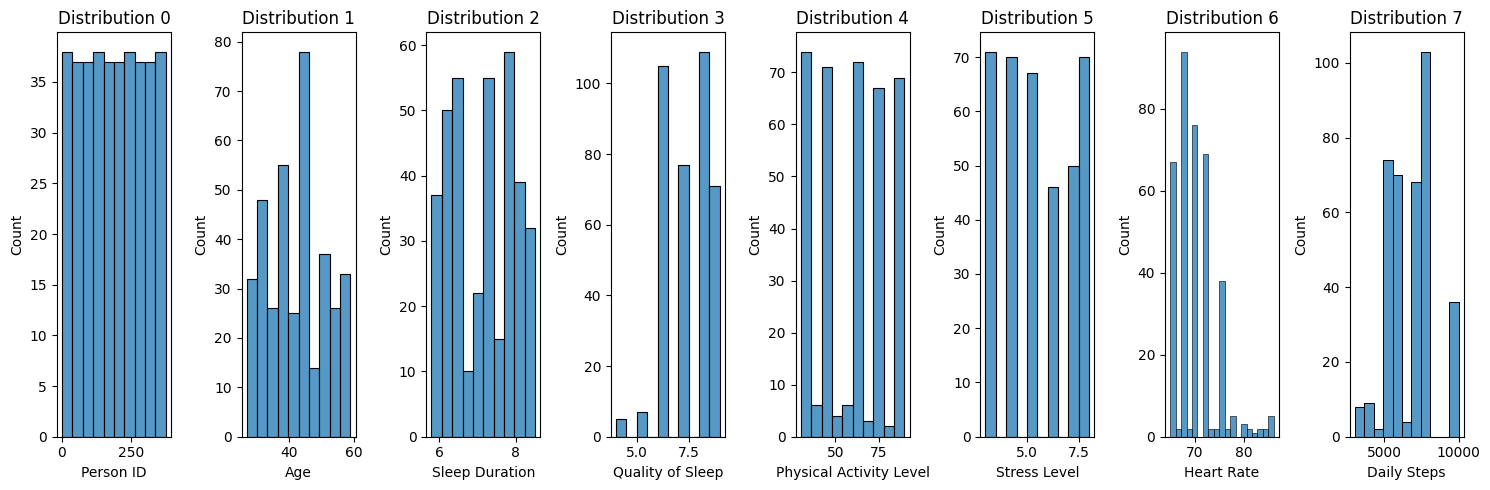

In [12]:
# Distribution of numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(15, 5))

for i, numerical_cols in enumerate(numerical_cols):
    sns.histplot(data=df, x=numerical_cols, ax=axes[i])
    axes[i].set_title(f'Distribution {i}')

plt.tight_layout()
plt.savefig('numeric_plots.png')
plt.show()

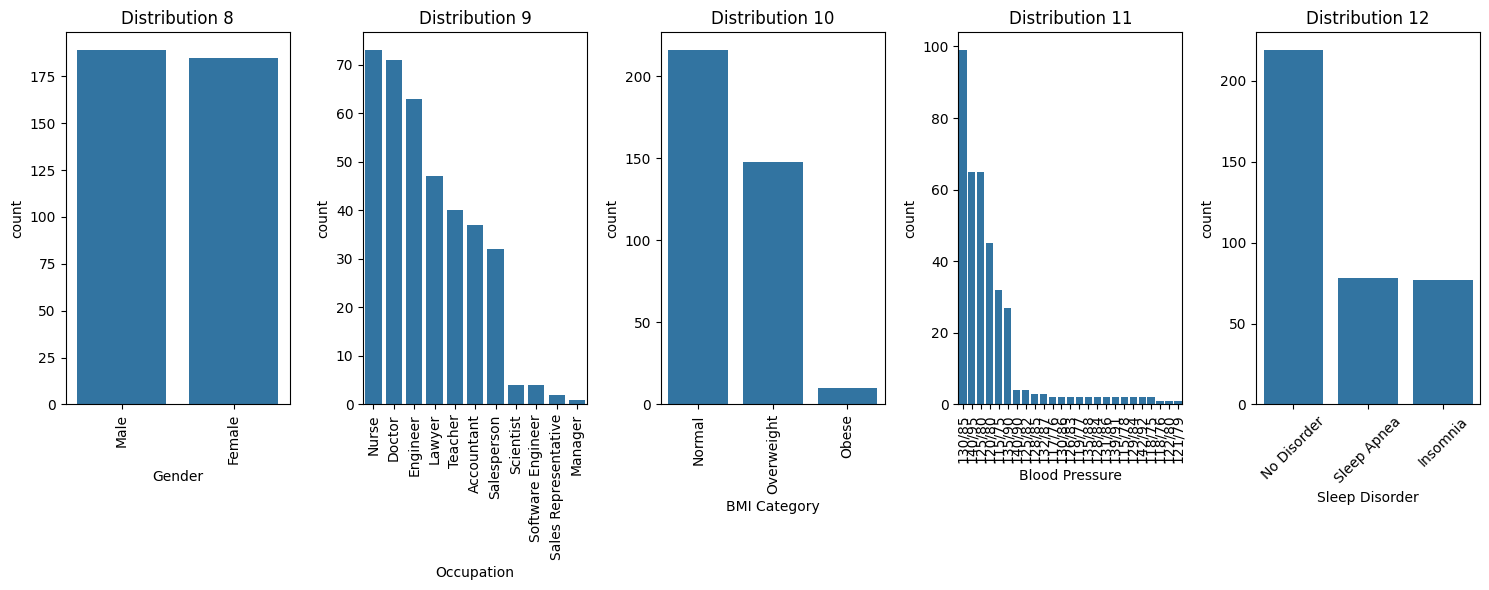

In [13]:
# Countplots for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_cols), figsize=(15, 6))

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribution {i + 8}')
    axes[i].tick_params(axis='x', rotation=90)
    
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('cat_plots.png')
plt.show()

## Data Preperation

In [14]:
# create copy of df before normalizing
normalized1 = df.copy()

In [15]:
# split into numeric and categorical features
numeric_features = normalized1.select_dtypes(include=['int64','float64']).columns
categorical_features = normalized1.select_dtypes(include=['object']).columns

In [16]:
# normalize features using functions
scaler = MinMaxScaler()
normalized1[numeric_features] = scaler.fit_transform(normalized1[numeric_features])

label_encoder = LabelEncoder()
for feature in categorical_features:
    normalized1[feature] = label_encoder.fit_transform(normalized1[feature])

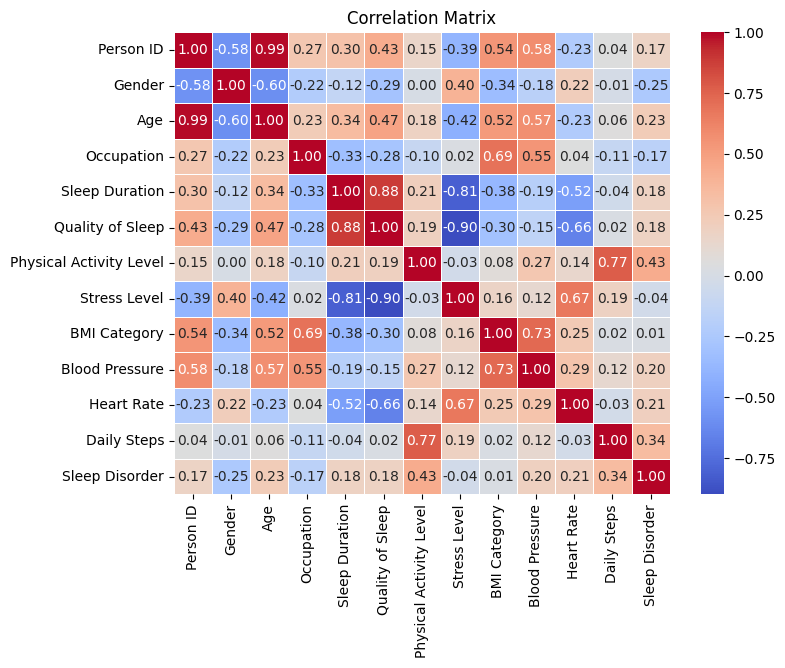

In [17]:
# print correlation matrix
correlation_matrix = normalized1.corr()
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png') # Save the figure as an image file
plt.show() # Display the plot

In [18]:
# combine sleep apnea and insomnia to sleep disorder in copied dataframe
normalized2 = df.copy()
normalized2['Sleep Disorder'] = normalized2['Sleep Disorder'].replace('Insomnia', 'Sleep Disorder')
normalized2['Sleep Disorder'] = normalized2['Sleep Disorder'].replace('Sleep Apnea', 'Sleep Disorder')
normalized2['Sleep Disorder']

0         No Disorder
1         No Disorder
2         No Disorder
3      Sleep Disorder
4      Sleep Disorder
            ...      
369    Sleep Disorder
370    Sleep Disorder
371    Sleep Disorder
372    Sleep Disorder
373    Sleep Disorder
Name: Sleep Disorder, Length: 374, dtype: object

In [19]:
# split into numeric and categorical features
numeric_features = normalized2.select_dtypes(include=['int64','float64']).columns
categorical_features = normalized2.select_dtypes(include=['object']).columns

In [20]:
# normalize features using functions
normalized2[numeric_features] = scaler.fit_transform(normalized2[numeric_features])
for feature in categorical_features:
    normalized2[feature] = label_encoder.fit_transform(normalized2[feature])

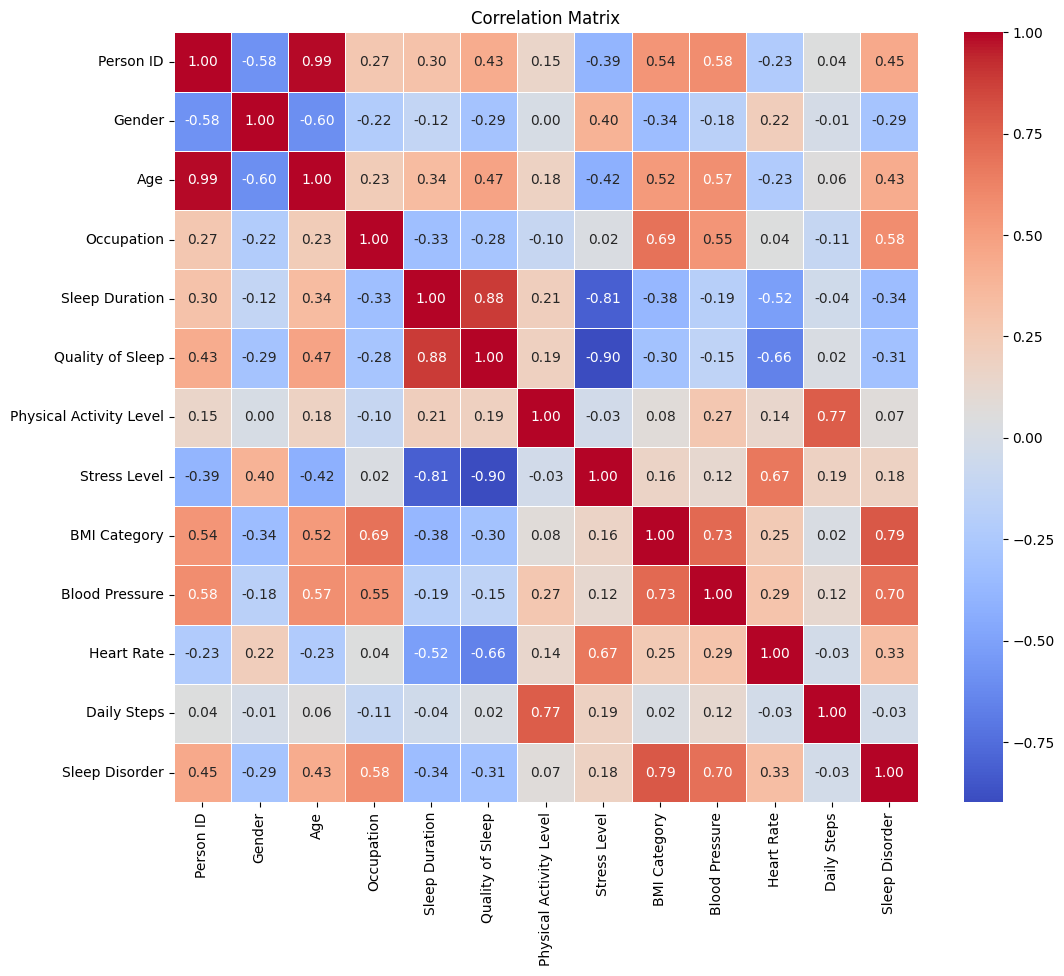

In [21]:
# print correlation matrix
correlation_matrix2 = normalized2.corr()
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix2.png',bbox_inches='tight') # Save the figure as an image file
plt.show() # Display the plot

Selected features: Age, Occupation, BMI Category, Blood Pressure

# Possible Research Questions
- Can machine learning effectivly predict the precense of a sleep disorder using lifestyle and physiological data?
    - include features based on level of correlation
- Are lifestyle or physiological factors more effective at prediciting sleep disorders?
    - split features based on category
- Which machine learning model most accuratly predicts sleep disorders?
    - cross validation

# 5-fold Cross Validation for Supervised Models
- Q: Which machine learning model most accuratly predicts sleep disorders?
- A: Decision Tree

In [22]:
# Define models with default parameters for comparison
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Gaussian Naïve Bayes": GaussianNB(),
    "Multinomial Naïve Bayes": MultinomialNB(),
    "Bernoulli Naïve Bayes": BernoulliNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine (SVM)": SVC(kernel='linear', probability=True, random_state=42),
    "Linear Regression": LinearRegression()
}

In [23]:
modeldf = normalized2.copy()
X = modeldf.drop(columns=['Person ID', 'Gender', 'Sleep Duration','Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps','Sleep Disorder'])
y = modeldf['Sleep Disorder']

In [24]:
# Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Additional metrics
scoring = {'accuracy': make_scorer(accuracy_score), 'f1': make_scorer(f1_score, average='weighted'), 'roc_auc': make_scorer(roc_auc_score, multi_class='ovr')}

# Perform cross-validation for each model
cv_results = {}
for name, model in models.items():
    print(f"Evaluating {name}...")
    # Cross-validation for accuracy, F1, and ROC AUC
    # Linear Regression may not work well with accuracy, so use R2 score for it
    if name == "Linear Regression":
        scores = cross_val_score(model, X, y, cv=cv, scoring='r2', n_jobs=-1)  # R² for regression
    else:
        scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
        f1_scores = cross_val_score(model, X, y, cv=cv, scoring='f1_weighted', n_jobs=-1)
        roc_auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc_ovr', n_jobs=-1)
    
    # Store the results for comparison
    if name == "Linear Regression":
        cv_results[name] = {
            'R² Score': np.mean(scores)
        }
    else:
        cv_results[name] = {
            'Accuracy': np.mean(scores),
            'F1 Score': np.mean(f1_scores),
            'ROC AUC': np.mean(roc_auc_scores)
        }

Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating K-Nearest Neighbors...
Evaluating Gaussian Naïve Bayes...
Evaluating Multinomial Naïve Bayes...
Evaluating Bernoulli Naïve Bayes...
Evaluating Logistic Regression...
Evaluating Support Vector Machine (SVM)...
Evaluating Linear Regression...


In [25]:
# Rank models based on Accuracy or R² Score
sorted_models = sorted(cv_results.items(), key=lambda x: x[1].get('Accuracy', x[1].get('R² Score', 0)), reverse=True)

# Find the best model based on Accuracy
best_model_name = sorted_models[0][0]
if best_model_name == "Linear Regression":
    best_model_score = sorted_models[0][1]['R² Score']
else:
    best_model_score = sorted_models[0][1]['Accuracy']

print("\nBest Model Based on Cross-Validation:")
if best_model_name == "Linear Regression":
    print(f"{best_model_name} with R²: {best_model_score:.4f}")
else:
    print(f"{best_model_name} with Accuracy: {best_model_score:.4f}")


Best Model Based on Cross-Validation:
Decision Tree with Accuracy: 0.9438


In [26]:
# Print ranked models
print("\nModel Ranking Based on Accuracy (or R² for Linear Regression):")
for idx, (name, metrics) in enumerate(sorted_models, 1):
    if name == "Linear Regression":
        print(f"{idx}. {name}: R² = {metrics['R² Score']:.4f}")
    else:
        print(f"{idx}. {name}: Accuracy = {metrics['Accuracy']:.4f}, F1 Score = {metrics['F1 Score']:.4f}, ROC AUC = {metrics['ROC AUC']:.4f}")


Model Ranking Based on Accuracy (or R² for Linear Regression):
1. Decision Tree: Accuracy = 0.9438, F1 Score = 0.9437, ROC AUC = 0.9391
2. Random Forest: Accuracy = 0.9438, F1 Score = 0.9437, ROC AUC = 0.9347
3. K-Nearest Neighbors: Accuracy = 0.9330, F1 Score = 0.9330, ROC AUC = 0.9222
4. Logistic Regression: Accuracy = 0.9090, F1 Score = 0.9091, ROC AUC = 0.9338
5. Bernoulli Naïve Bayes: Accuracy = 0.9063, F1 Score = 0.9065, ROC AUC = 0.9034
6. Support Vector Machine (SVM): Accuracy = 0.9063, F1 Score = 0.9065, ROC AUC = 0.9270
7. Gaussian Naïve Bayes: Accuracy = 0.9037, F1 Score = 0.9038, ROC AUC = 0.9336
8. Multinomial Naïve Bayes: Accuracy = 0.8690, F1 Score = 0.8691, ROC AUC = 0.8603
9. Linear Regression: R² = 0.6436




| Rank | Model                        | Accuracy / R² | F1 Score | ROC AUC |
|------|------------------------------|--------------|----------|---------|
| 1    | Decision Tree                | 0.9438       | 0.9437   | 0.9391  |
| 2    | Random Forest                | 0.9438       | 0.9437   | 0.9347  |
| 3    | K-Nearest Neighbors          | 0.9330       | 0.9330   | 0.9222  |
| 4    | Logistic Regression          | 0.9090       | 0.9091   | 0.9338  |
| 5    | Bernoulli Naïve Bayes        | 0.9063       | 0.9065   | 0.9034  |
| 6    | Support Vector Machine (SVM) | 0.9063       | 0.9065   | 0.9270  |
| 7    | Gaussian Naïve Bayes         | 0.9037       | 0.9038   | 0.9336  |
| 8    | Multinomial Naïve Bayes      | 0.8690       | 0.8691   | 0.8603  |
| 9    | Linear Regression            | R² = 0.6436  | -        | -       |


C:\Users\scgoo\AppData\Local\Temp\ipykernel_16716\3521757823.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vals, y=models, palette="viridis")
C:\Users\scgoo\AppData\Local\Temp\ipykernel_16716\3521757823.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vals, y=models, palette="viridis")
C:\Users\scgoo\AppData\Local\Temp\ipykernel_16716\3521757823.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vals, y=models, palette="viridis")
C:\Users\scgoo\AppData\Local\Temp\ipykernel_16716\3521757823.py:35: FutureWarning: 

Passing `

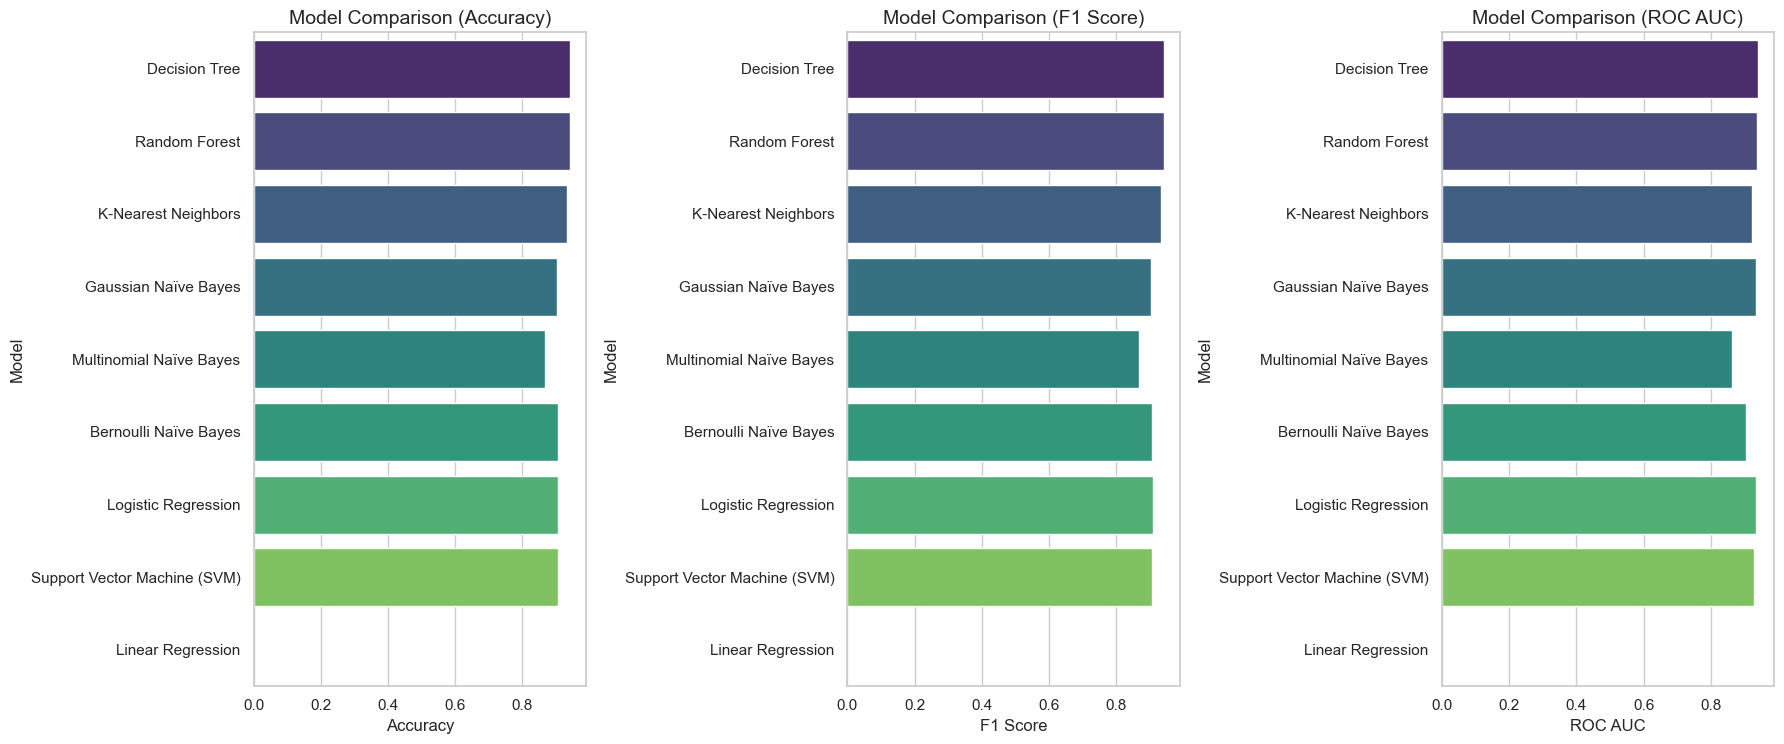

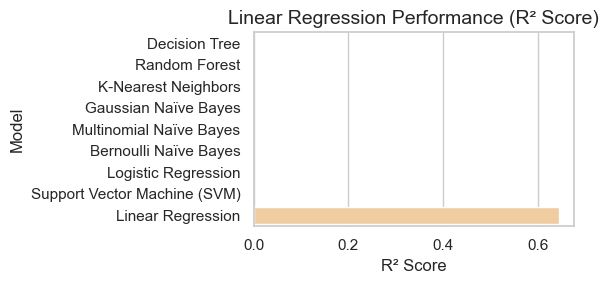

In [86]:
# Convert cv_results to a structured format
models = list(cv_results.keys())
accuracies = [cv_results[m].get('Accuracy', None) for m in models]
f1_scores = [cv_results[m].get('F1 Score', None) for m in models]
roc_aucs = [cv_results[m].get('ROC AUC', None) for m in models]
r2_scores = [cv_results[m].get('R² Score', None) for m in models]

# Set larger figure size to prevent overlapping
plt.figure(figsize=(18, 8))
sns.set(style="whitegrid")

# Define font size for better readability
font_size = 12

# Plot Accuracy, F1 Score, and ROC AUC
metrics = ["Accuracy", "F1 Score", "ROC AUC"]
values = [accuracies, f1_scores, roc_aucs]

for i, (metric, vals) in enumerate(zip(metrics, values)):
    plt.subplot(1, 3, i+1)
    sns.barplot(x=vals, y=models, palette="viridis")
    plt.xlabel(metric, fontsize=font_size)
    plt.ylabel("Model", fontsize=font_size)
    plt.title(f"Model Comparison ({metric})", fontsize=font_size + 2)
    plt.xticks(fontsize=font_size - 1)
    plt.yticks(fontsize=font_size - 1)

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("cv_modelComparison1.png") # Saves the figure as a PNG image

# Plot R² separately if Linear Regression is included
if any(r2_scores):
    plt.figure(figsize=(6, 3))
    sns.barplot(x=r2_scores, y=models, palette="magma")
    plt.xlabel("R² Score", fontsize=font_size)
    plt.ylabel("Model", fontsize=font_size)
    plt.title("Linear Regression Performance (R² Score)", fontsize=font_size + 2)
    plt.xticks(fontsize=font_size - 1)
    plt.yticks(fontsize=font_size - 1)

plt.tight_layout()
plt.savefig("cv_modelComparison2.png") # Saves the figure as a PNG image
plt.show()


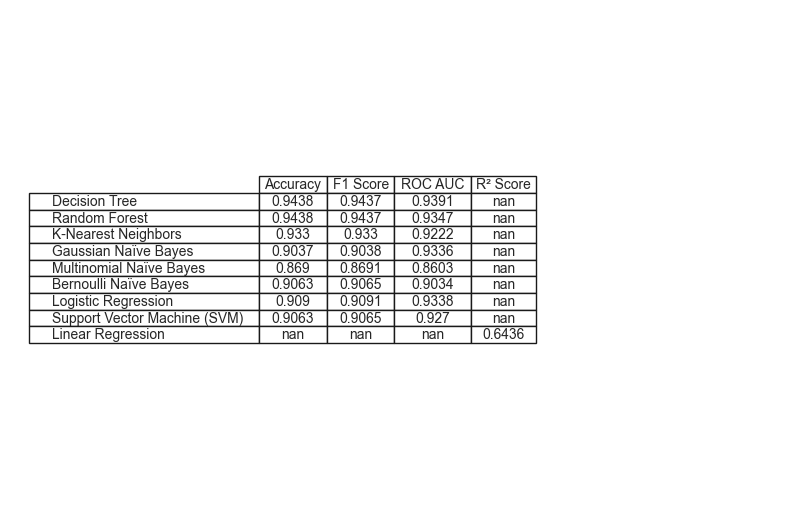

In [98]:
# Create DataFrame from cv_results
results_df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracies,
    "F1 Score": f1_scores,
    "ROC AUC": roc_aucs,
    "R² Score": r2_scores
}).set_index("Model")

# Remove NaN values (if any) for clean display
results_df = results_df.dropna(axis=1, how="all")

# Set up figure size
fig, ax = plt.subplots(figsize=(10, len(models) * 0.5 + 2))

# Hide axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 
ax.set_frame_on(False) 

# Create the table
table = ax.table(cellText=results_df.round(4).values,  # Round numbers for better readability
                 colLabels=results_df.columns,
                 rowLabels=results_df.index,
                 cellLoc='center', 
                 loc='center')

# Adjust font size and column width
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(results_df.columns))))  

# Save table as an image
plt.savefig("cv_results_table.png", dpi=300, bbox_inches="tight")
plt.show()

In [28]:
results = {}

# Logistic Regression
- add regression with 0 and 1 for sleep disorder col

### Model Training

In [29]:
# create copy dataframe before selecting features and splitting from training
modeldf = normalized2.copy()
X = modeldf.drop(columns=['Person ID', 'Gender', 'Sleep Duration','Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps','Sleep Disorder'])
y = modeldf['Sleep Disorder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
modeldf.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,0.000000,1,0.00000,9,0.111111,0.4,0.2,0.6,2,11,0.571429,0.171429,0
1,0.002681,1,0.03125,1,0.148148,0.4,0.5,1.0,0,9,0.476190,1.000000,0
2,0.005362,1,0.03125,1,0.148148,0.4,0.5,1.0,0,9,0.476190,1.000000,0
3,0.008043,1,0.03125,6,0.037037,0.0,0.0,1.0,1,22,0.952381,0.000000,1
4,0.010724,1,0.03125,6,0.037037,0.0,0.0,1.0,1,22,0.952381,0.000000,1


In [31]:
# Train the Logistic Regression model
log = LogisticRegression()
log.fit(X_train, y_train)

# Predict on test set
y_pred_log = log.predict(X_test)

# Model Accuracy
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Model Accuracy: {accuracy_log:.2f}")


Model Accuracy: 0.92


### Model Evaluation

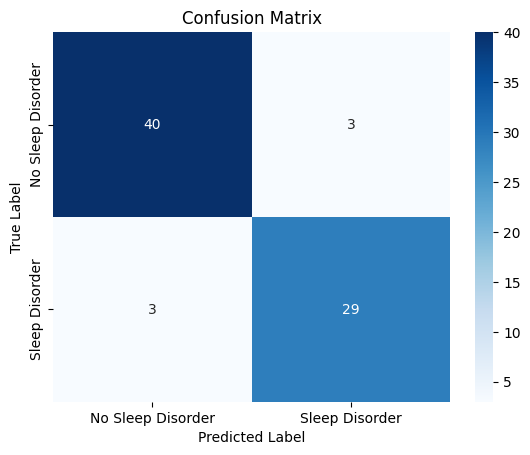

In [32]:
# print confusion matrix
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", xticklabels=["No Sleep Disorder", "Sleep Disorder"], yticklabels=["No Sleep Disorder", "Sleep Disorder"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.savefig("lr_cm.png") # Saves the figure as a PNG image
plt.show()

In [33]:
# print classification report
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.91      0.91      0.91        32

    accuracy                           0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75



In [34]:
from sklearn.metrics import f1_score
lr_f1 = f1_score(y_test,y_pred_log)
print(lr_f1)

0.90625


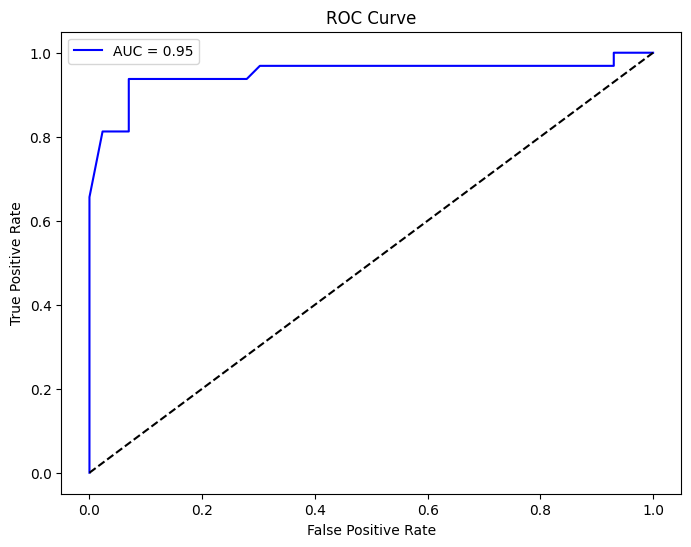

In [35]:
# Compute probabilities
y_prob_log = log.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_log:.2f}", color="blue")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig("lr_roc.png") # Saves the figure as a PNG image
plt.show()

In [36]:
"""
results["log_reg"] = {
        'Accuracy': accuracy_log,
        'F1 Score': lr_f1,
        'ROC AUC': roc_auc_log
    }
    """

'\nresults["log_reg"] = {\n        \'Accuracy\': accuracy_log,\n        \'F1 Score\': lr_f1,\n        \'ROC AUC\': roc_auc_log\n    }\n    '

# K-Nearest Neighbors

In [37]:
# create copy dataframe before selecting features and splitting from training
modeldf = normalized2.copy()
X = modeldf.drop(columns=['Person ID', 'Gender', 'Sleep Duration','Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps','Sleep Disorder'])
y = modeldf['Sleep Disorder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

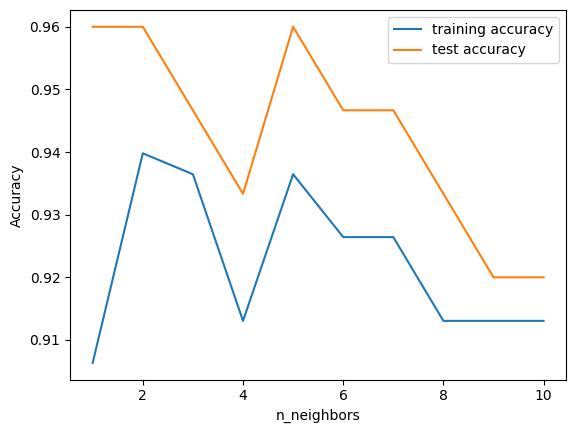

In [38]:
# print graph to determine which k maximizes train and test accuracy
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig("k_selection.png") # Saves the figure as a PNG image

In [39]:
# build model
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

# Predict on test set
y_pred_knn = clf.predict(X_test)

# print accuracy
accuracy_knn = clf.score(X_test, y_test)
print(f"Model Accuracy: {accuracy_knn:.2f}")

Model Accuracy: 0.96


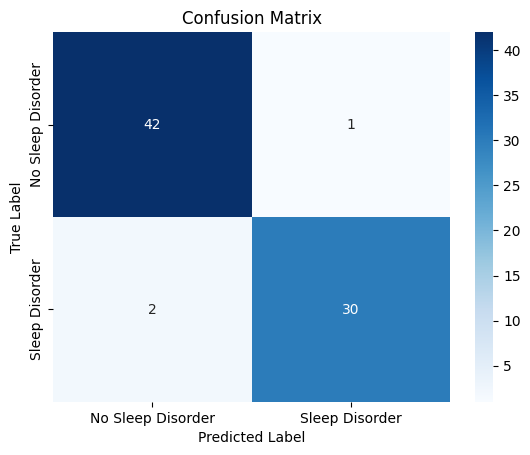

In [40]:
# print confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["No Sleep Disorder", "Sleep Disorder"], yticklabels=["No Sleep Disorder", "Sleep Disorder"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.savefig("knn_cm.png") # Saves the figure as a PNG image
plt.show()

In [41]:
# print classification report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.97      0.94      0.95        32

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [42]:
from sklearn.metrics import f1_score
knn_f1 = f1_score(y_test,y_pred_knn)
print(knn_f1)

0.9523809523809523


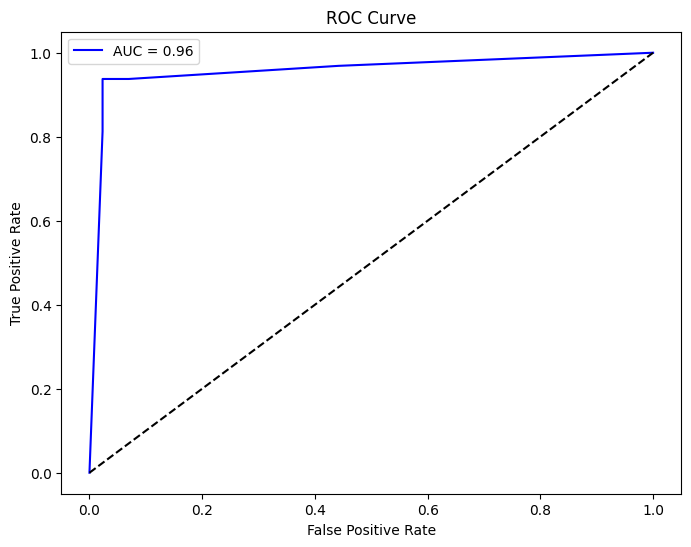

In [43]:
# Compute probabilities
y_prob_knn = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_knn:.2f}", color="blue")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig("knn_roc.png") # Saves the figure as a PNG image
plt.show()

In [44]:
results["knn"] = {
        'Accuracy': accuracy_knn,
        'F1 Score': knn_f1,
        'ROC AUC': roc_auc_knn
    }
results["knn"]

{'Accuracy': 0.96,
 'F1 Score': 0.9523809523809523,
 'ROC AUC': np.float64(0.9571220930232558)}

# Support Vector Machines

In [45]:
# create copy dataframe before selecting features and splitting from training
modeldf = normalized2.copy()
X = modeldf.drop(columns=['Person ID', 'Gender', 'Sleep Duration','Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps','Sleep Disorder'])
y = modeldf['Sleep Disorder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': ['scale', 0.01, 0.1, 1], 
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize SVM
svm_clf = SVC()

# Grid search with cross-validation
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}


In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Create a pipeline for feature scaling and training a Linear SVM classifier
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(C=10, gamma=0.1, kernel='rbf',probability=True))
])

# Train the model
svm_clf.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm_clf.predict(X_test)

# Model Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Model Accuracy: {accuracy_svm:.2f}")

Model Accuracy: 0.95


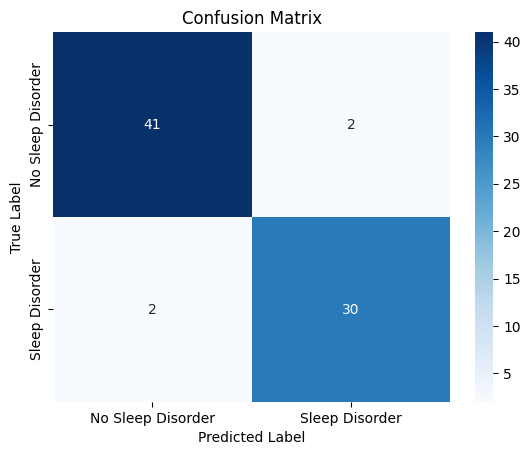

In [48]:
# print confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Sleep Disorder", "Sleep Disorder"], yticklabels=["No Sleep Disorder", "Sleep Disorder"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.savefig("svm_cm.png") # Saves the figure as a PNG image
plt.show()

In [49]:
# print classification report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.94      0.94      0.94        32

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



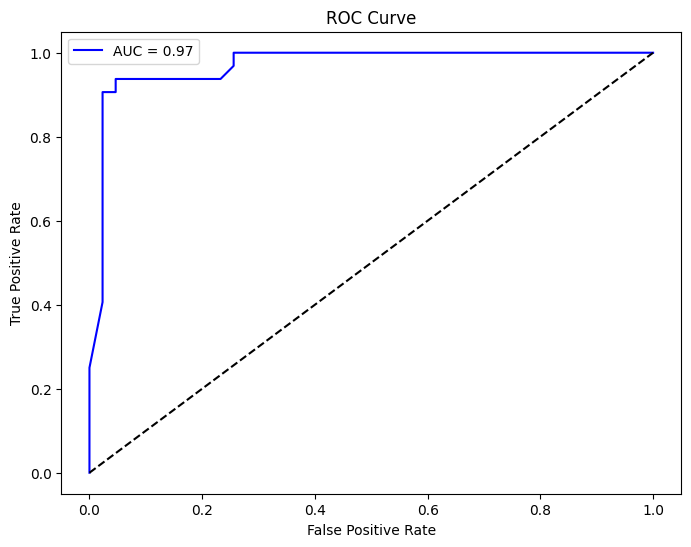

In [50]:
# Compute probabilities
y_prob_svm = svm_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_svm:.2f}", color="blue")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig("svm_roc.png") # Saves the figure as a PNG image
plt.show()

# Decision Tree

In [51]:
# create copy dataframe before selecting features and splitting from training
modeldf = normalized2.copy()
X = modeldf.drop(columns=['Person ID', 'Gender', 'Sleep Duration','Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps','Sleep Disorder'])
y = modeldf['Sleep Disorder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
from sklearn.tree import DecisionTreeClassifier

# optimize parameters
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train) 

# Best Decision Tree Model
best_dt = grid_search.best_estimator_
print(f"\nBest Decision Tree Parameters: {grid_search.best_params_}")


Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [53]:
# make predictions
y_pred_dt = best_dt.predict(X_test)

# compute accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Model Accuracy: {accuracy_dt:.2f}")

Model Accuracy: 0.96


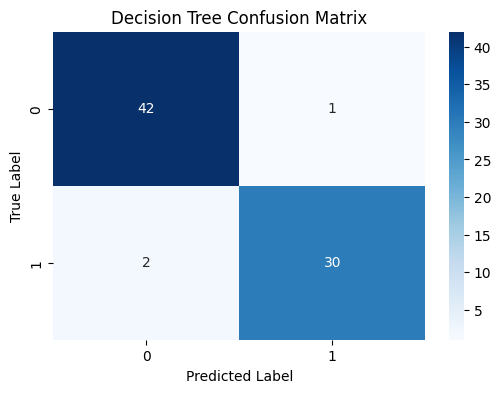

In [54]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Plot Decision Tree Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=best_dt.classes_, yticklabels=best_dt.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Confusion Matrix')
plt.savefig("dt_cm.png") # Saves the figure as a PNG image
plt.show()

In [55]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.97      0.94      0.95        32

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [56]:
dt_f1 = f1_score(y_test,y_pred_dt)
print(dt_f1)

0.9523809523809523


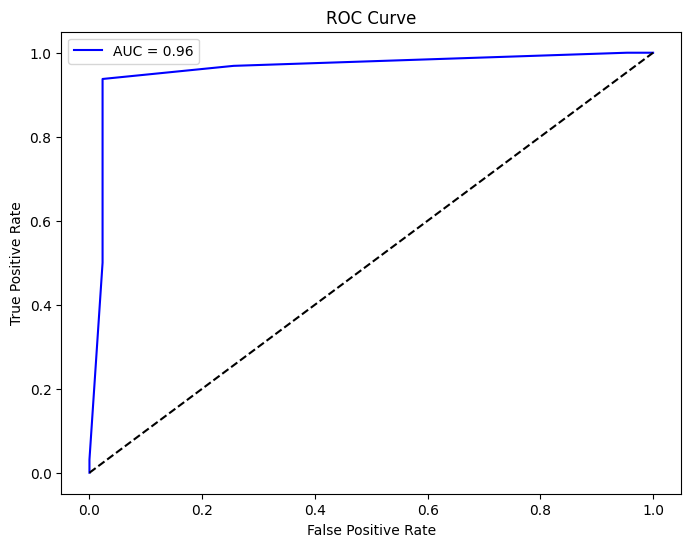

In [57]:
# Compute probabilities
y_prob_dt = best_dt.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_dt:.2f}", color="blue")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig("dt_roc.png") # Saves the figure as a PNG image
plt.show()

In [58]:
results["decision_tree"] = {
        'Accuracy': accuracy_dt,
        'F1 Score': dt_f1,
        'ROC AUC': roc_auc_dt
    }
results["decision_tree"]

{'Accuracy': 0.96,
 'F1 Score': 0.9523809523809523,
 'ROC AUC': np.float64(0.9611191860465117)}

# Random Forest

In [101]:
# create copy dataframe before selecting features and splitting from training
modeldf = normalized2.copy()
X = modeldf.drop(columns=['Person ID', 'Gender', 'Sleep Duration','Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps','Sleep Disorder'])
y = modeldf['Sleep Disorder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
from sklearn.ensemble import RandomForestClassifier

# optimize parameters
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

rf_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best Random Forest Model
best_rf = grid_search_rf.best_estimator_
print(f"\nBest Random Forest Parameters: {grid_search_rf.best_params_}")



Best Random Forest Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [103]:
# make predictions
y_pred_rf = best_rf.predict(X_test)

# compute accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Model Accuracy: {accuracy_rf:.2f}")

Model Accuracy: 0.96


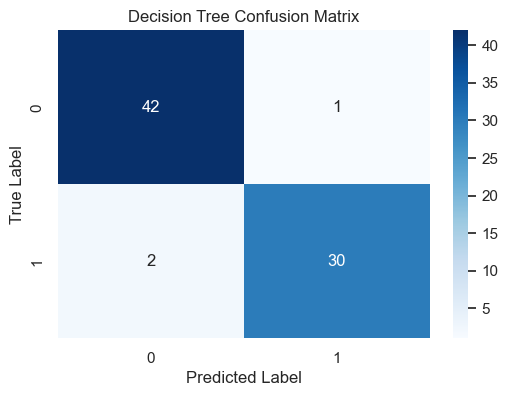

In [104]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot Decision Tree Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Confusion Matrix')
plt.savefig("rf_cm.png") # Saves the figure as a PNG image
plt.show()

In [105]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.97      0.94      0.95        32

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [106]:
rf_f1 = f1_score(y_test,y_pred_rf)
print(rf_f1)

0.9523809523809523


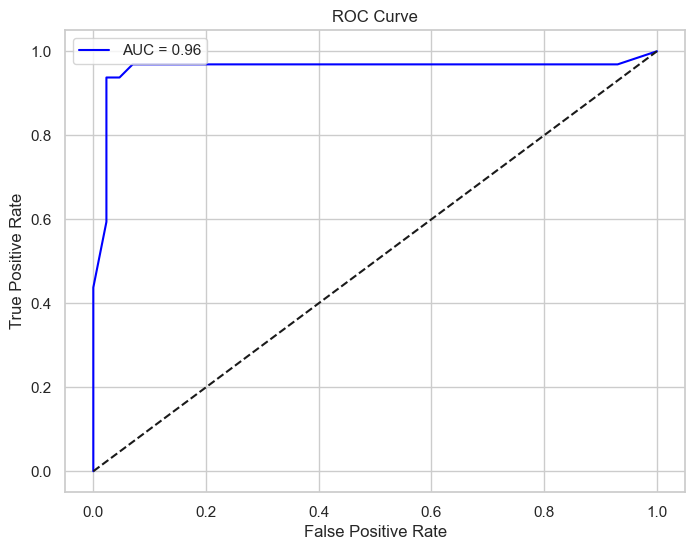

In [107]:
# Compute probabilities
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_rf:.2f}", color="blue")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig("rf_roc.png") # Saves the figure as a PNG image
plt.show()

In [66]:
results["random_forest"] = {
        'Accuracy': accuracy_rf,
        'F1 Score': rf_f1,
        'ROC AUC': roc_auc_rf
    }
results["random_forest"]

{'Accuracy': 0.96,
 'F1 Score': 0.9523809523809523,
 'ROC AUC': np.float64(0.9582122093023256)}

# Model Comparison

In [67]:
# make subplots for ROC for top 3 models (1 roww 3 columns)
# name them (a), (b), (c) and explain in caption

               Accuracy  F1 Score   ROC AUC
knn                0.96  0.952381  0.957122
decision_tree      0.96  0.952381  0.961119
random_forest      0.96  0.952381  0.958212


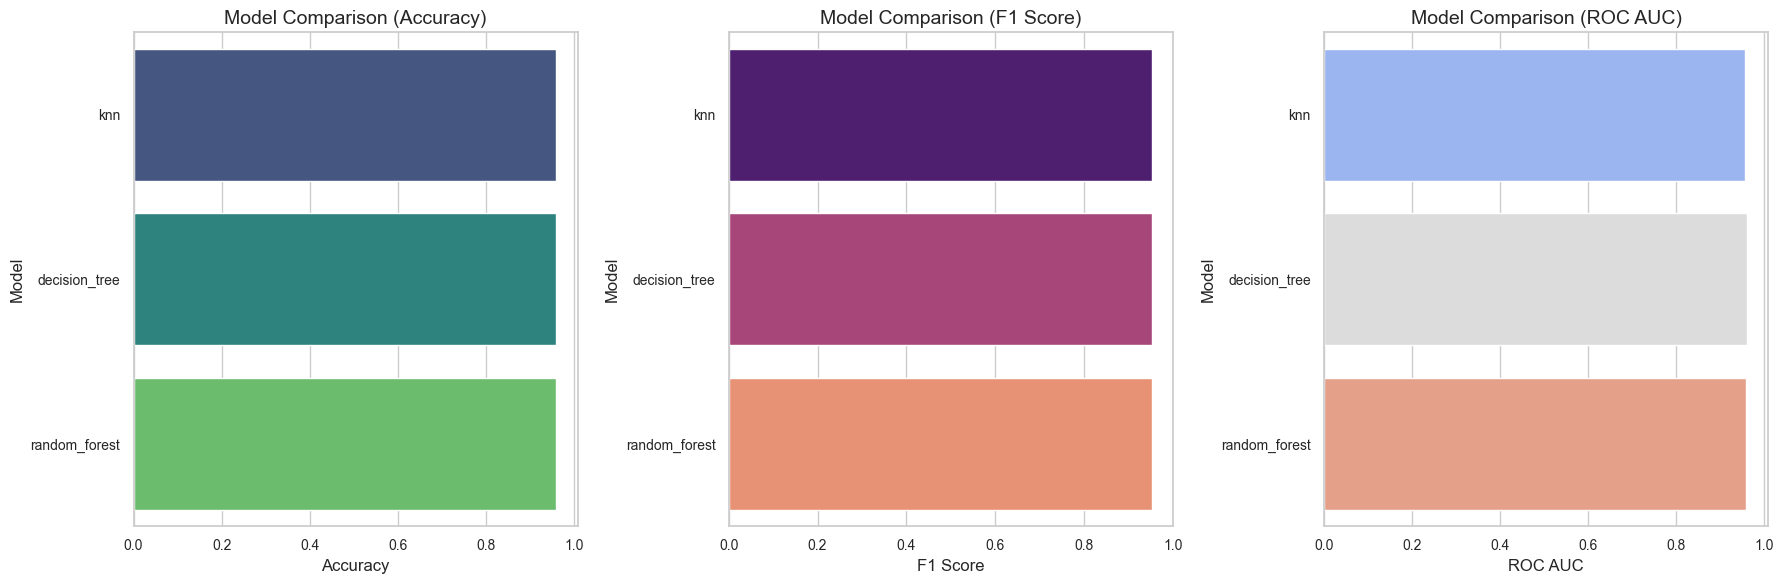

In [96]:
# Convert dictionary to DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Display results table
print(results_df)

# Set figure size
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.set(style="whitegrid")

# Define metrics to plot
metrics = ["Accuracy", "F1 Score", "ROC AUC"]
colors = ["viridis", "magma", "coolwarm"]

# Create a bar plot for each metric
for i, metric in enumerate(metrics):
    sns.barplot(y=results_df.index, x=results_df[metric], ax=axes[i], hue=results_df.index, palette=colors[i], legend=False)
    axes[i].set_title(f"Model Comparison ({metric})", fontsize=14)
    axes[i].set_xlabel(metric, fontsize=12)
    axes[i].set_ylabel("Model", fontsize=12)
    axes[i].tick_params(axis='both', labelsize=10)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("3_model_performance_subplots.png", dpi=300, bbox_inches="tight")
plt.show()


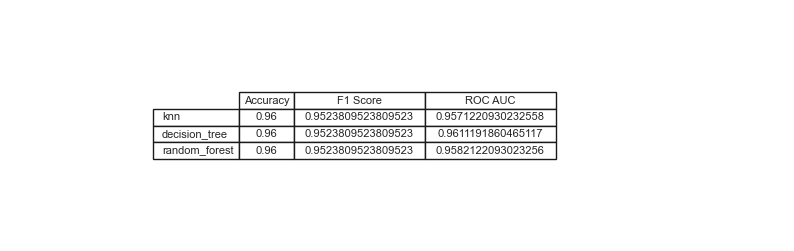

In [93]:
# Set figure size
fig, ax = plt.subplots(figsize=(10, 3))

# Hide axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 
ax.set_frame_on(False) 

# Create table
table = ax.table(cellText=results_df.values, 
                 colLabels=results_df.columns, 
                 rowLabels=results_df.index, 
                 cellLoc='center', 
                 loc='center')

# Style table
table.auto_set_font_size(False)
table.set_fontsize(8)
table.auto_set_column_width(col=list(range(len(results_df.columns))))  # Adjust column width

# Save as image
plt.savefig("3_model_results_table.png", dpi=300, bbox_inches="tight")
plt.show()

In [69]:
sorted_models = sorted(results.items(), key=lambda x: x[1].get('ROC AUC',0), reverse=True)

# Find the best model based on Accuracy
best_model_name = sorted_models[0][0]
best_model_score = sorted_models[0][1]['ROC AUC']

print("\nBest Model:")

print(f"{best_model_name} with ROC AUC: {best_model_score:.4f}")


Best Model:
decision_tree with ROC AUC: 0.9611


In [70]:
print("\nModel Ranking Based on ROC AUC:")
for idx, (name, metrics) in enumerate(sorted_models, 1):
    print(f"{idx}. {name}: Accuracy = {metrics['Accuracy']:.4f}, F1 Score = {metrics['F1 Score']:.4f}, ROC AUC = {metrics['ROC AUC']:.4f}")


Model Ranking Based on ROC AUC:
1. decision_tree: Accuracy = 0.9600, F1 Score = 0.9524, ROC AUC = 0.9611
2. random_forest: Accuracy = 0.9600, F1 Score = 0.9524, ROC AUC = 0.9582
3. knn: Accuracy = 0.9600, F1 Score = 0.9524, ROC AUC = 0.9571


In [71]:
# submit as word or latex doc with figures
# include code in submission

Research Qs:
Can ML effectivly predict sleep disorder using lifestyle and phsiological data?


In [72]:
# save all figures to include in project
# start filling in outline
# march 7 deadline for abstract for International Conference on Computational Science and Its Applications (ICCSA)
# literature review
# summarize article and read paper
# write methods